In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from datetime import datetime,date,timedelta
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [2]:
#Input Working directory or directory you want to work in
dirname=input("Enter the current working directory")
os.chdir(dirname)# Set current working directory
os.getcwd() # Get current working directory

Enter the current working directory/Users/shivamgoel/Desktop/Python/final


'/Users/shivamgoel/Desktop/Python/final'

In [3]:
airlines_data = pd.read_csv('data/airlines.csv',low_memory=False,error_bad_lines=False,warn_bad_lines=False, skipinitialspace=True)
airports_data = pd.read_csv('data/airports.csv',low_memory=False,error_bad_lines=False,warn_bad_lines=False, skipinitialspace=True)
flights = pd.read_csv('data/flights.csv',low_memory=False,error_bad_lines=False,warn_bad_lines=False, skipinitialspace=True,
                           na_values=['NA      ', 'NA    ', 'NA   ', 'NA', 'NA ', 'NA ', 'NaN', 'NAN', ''])

In [4]:
#Shapping Data
airlines_data.shape[0] #no of rows=14
airlines_data.shape[1] #no of columns=2

airports_data.shape[0] #no of rows=322
airports_data.shape[1] #no of columns=7

flights.shape[0] #no of rows = 5819079
flights.shape[1] #no of columns = 31
airports_data.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [5]:
unique_flights_data = {}
for item in flights.columns:
    unique_flights_data[item] = flights[item].unique()
#unique_flights_data

In [6]:
day_of_week_desc={
    1:'Monday',
    2:'Tuesday',
    3:'Wednesday',
    4:'Thursday',
    5:'Friday',
    6:'Saturday',
    7:'Sunday'
}
flights['DESC_DOW']=flights['DAY_OF_WEEK'].apply(lambda a:day_of_week_desc[a])


In [7]:
airlines_dict = dict(zip(airlines_data['IATA_CODE'],airlines_data['AIRLINE']))
airport_dict = dict(zip(airports_data['IATA_CODE'],airports_data['AIRPORT']))
flights['DESC_AIRLINE'] = flights['AIRLINE'].apply(lambda x: airlines_dict[x])
flights.head()['DESC_AIRLINE']

0      Alaska Airlines Inc.
1    American Airlines Inc.
2           US Airways Inc.
3    American Airlines Inc.
4      Alaska Airlines Inc.
Name: DESC_AIRLINE, dtype: object

# Let's look at some insights from the data. Most busy day.

//anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:2644: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


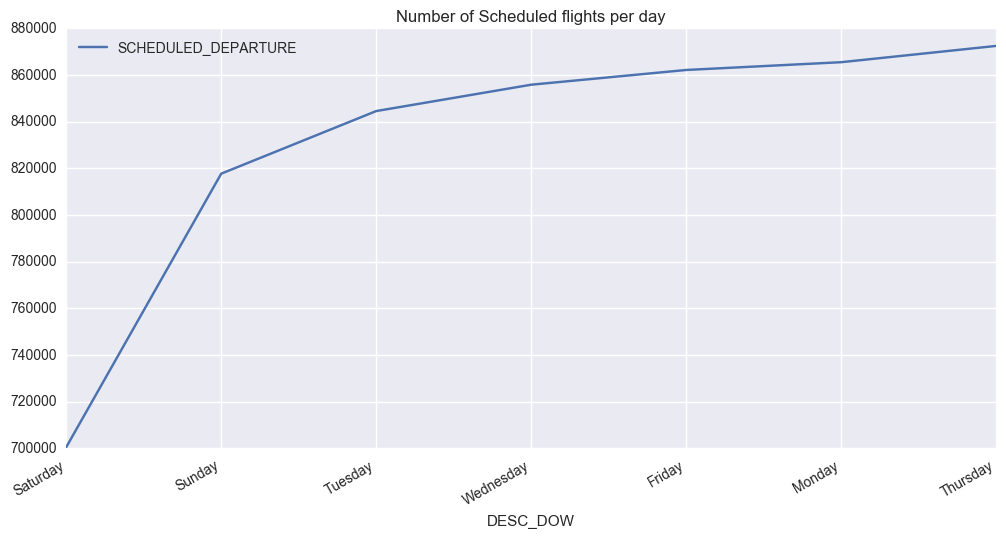

In [8]:
df_busyday = pd.DataFrame(flights.groupby('DESC_DOW').count()['SCHEDULED_DEPARTURE'])
df_busyday = df_busyday.sort_values(['SCHEDULED_DEPARTURE'],ascending = 1)
df_busyday.head()
df_busyday.plot(kind='line',subplots=True,c='r',figsize=(12,6))
plt.xticks()
plt.yticks()
plt.title('Number of Scheduled flights per day')

In [9]:
# import holidays dataset
holidays = pd.read_csv('data/holidays.csv')
holidays.Date = pd.to_datetime(holidays.Date,infer_datetime_format=True)
holidays['Month'] = holidays.Date.apply(lambda x:x.month)
holidays['Week'] = map(lambda x:x.isocalendar()[1],holidays.Date)
#print "before cleaning:"
#print holidays.head()

#holidays['Date'] = holidays.apply(lambda r:clean_date(r[0],r[1]),axis=1)
#print "after cleaning:"
holidays.head()

,Year,Date,Holiday,Month,Week
0,2009,2009-01-01,New Year's Day,1,<map object at 0x112909f98>
1,2009,2009-01-19,"Birthday of Martin Luther King, Jr.",1,<map object at 0x112909f98>
2,2009,2009-02-16,Washington's Birthday,2,<map object at 0x112909f98>
3,2009,2009-05-25,Memorial Day,5,<map object at 0x112909f98>
4,2009,2009-07-03,Independence Day,7,<map object at 0x112909f98>


In [10]:
def clean_date(year,date):
    """Used to clean holidays date format"""
    day2Int = {'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}
    month2Int = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,
                 'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
    r = re.sub('[\W_]','|',date).split('|')
    month = month2Int[r[2]]
    dayofWeek = day2Int[r[0]]
    dayofMonth = int(r[3])
    return dt.datetime(year,month,dayofMonth)

def daystocloseholiday(date,hdays=holidays):
    """calculate the days between a given date and the closest holiday to it"""
    hdays = (hdays.Date-date).min()
    
    return hdays